<a href="https://colab.research.google.com/github/np-helios/RealTimeDriverDrowsinessDtection/blob/main/Drowsiness_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install cmake

In [3]:
pip install mediapipe opencv-python numpy

In [4]:
pip install dlib

In [5]:
pip install face_recognition

In [6]:
import os
import cv2
import numpy as np
from PIL import Image
import face_recognition
import pickle
from scipy.spatial import distance
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Highlighting Facial Points in the Image**

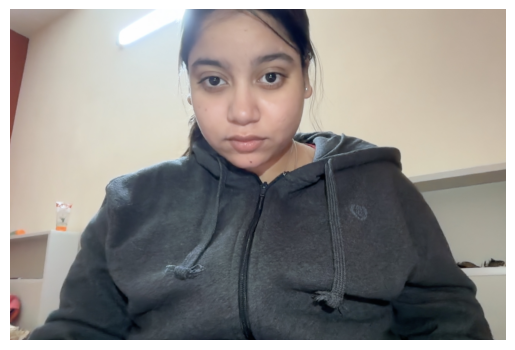

In [7]:
image_path = 'test1.jpg'
image = Image.open(image_path)
plt.axis('off')
plt.imshow(image)
plt.show()


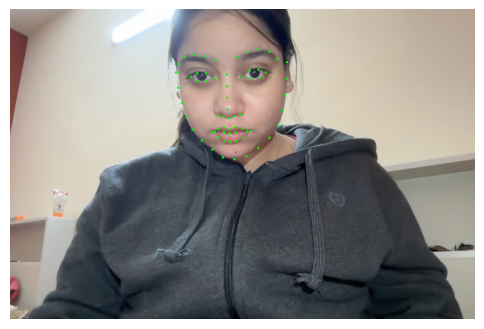

In [3]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from PIL import Image
import face_recognition
import pickle
from scipy.spatial import distance
import warnings
warnings.filterwarnings('ignore')
image_path = 'test1.jpg'

def highlight_facial_points(image_path):
    image_bgr = cv2.imread(image_path)


    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    face_locations = face_recognition.face_locations(image_rgb, model='hog')

    for face_location in face_locations:
        landmarks = face_recognition.face_landmarks(image_rgb, [face_location])[0]

        for landmark_type, landmark_points in landmarks.items():
            for (x,y) in landmark_points:
                cv2.circle(image_rgb, (x,y), 3, (0, 255, 0), 5)

    return image_rgb

output_image = highlight_facial_points(image_path)

plt.figure(figsize=(6,6))
plt.imshow(output_image)
plt.axis('off')
plt.show()

In [6]:
#Cal eye aspect ratio
def eye_aspect_ratio(eye):
  A = distance.euclidean(eye[1], eye[5])
  B = distance.euclidean(eye[2], eye[4])
  C = distance.euclidean(eye[0], eye[3])
  ear = (A+B)/(2.0*C)
  return ear

#Cal mouth aspect ratio
def mouth_aspect_ratio(mouth):
  A = distance.euclidean(mouth[2], mouth[10])
  B = distance.euclidean(mouth[4], mouth[8])
  C = distance.euclidean(mouth[0], mouth[6])
  mar = (A+B)/(2.0*C)
  return mar

In [9]:
def process_image(frame):
  #define threshold
  EYE_AR_THRESH = 0.25
  #EYE_AR_CONSEC_FRAMES = 3
  MOUTH_AR_THRESH = 0.6

  if frame is None:
    raise ValueError("Frame is None")

  rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

  #find all facial locations
  face_locations = face_recognition.face_locations(rgb_frame, model='hog')

  eye_flag = mouth_flag = False
  for face_location in face_locations:
    landmarks = face_recognition.face_landmarks(rgb_frame, [face_location])[0]

    #rxtract ete and mouth coordinates
    left_eye = np.array(landmarks['left_eye'])
    right_eye = np.array(landmarks['right_eye'])
    mouth = np.array(landmarks['bottom_lip'])

    #calculate ear and mar
    left_ear = eye_aspect_ratio(left_eye)
    right_ear = eye_aspect_ratio(right_eye)
    ear = (left_ear+right_ear) / 2.0
    mar = mouth_aspect_ratio(mouth)

    #check if eye aspect ratio is below threshold means
    if ear < EYE_AR_THRESH:
      eye_flag = True

    # check if yawning
    if mar > MOUTH_AR_THRESH:
      mouth_flag = True

    return eye_flag, mouth_flag


In [10]:
img = cv2.imread(image_path)
process_image(img)

(False, False)

**Now lets do it in real time**